# 1.1 Example: Polynomial Curve Fitting

Polynomial regression of synthetic data (sine wave + Gaussian noise).

Data obtained from http://research.microsoft.com/en-us/um/people/cmbishop/PRML/webdatasets/curvefitting.txt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

## Load data

In [2]:
data = np.loadtxt('../data/curvefitting.txt', dtype=str, delimiter=' ')

In [3]:
data = data.astype(np.float64)

In [4]:
x = data[:, 0]
t = data[:, 1]

In [5]:
# for plotting the sinusoid
x_grid = np.linspace(0, 1, 100)
t_grid = np.sin(2 * np.pi * x_grid)

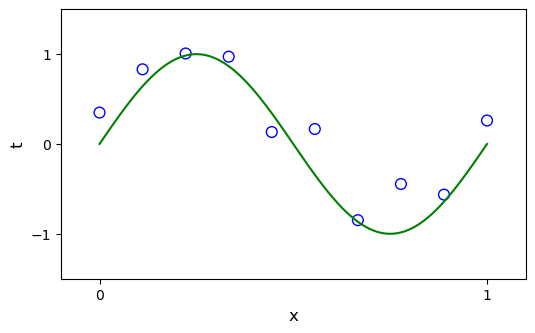

In [6]:
plt.figure(figsize=(6, 3.5))
plt.plot(x_grid, t_grid, 'g')  # ground truth sinusoid
plt.scatter(x, t, facecolors='none', edgecolors='b', s=60)
plt.xlim([-0.1, 1.1])
plt.ylim([-1.5, 1.5])
plt.xticks(ticks=[0, 1])
plt.yticks(ticks=[-1, 0, 1])
plt.xlabel('x', fontsize=12)
plt.ylabel('t', fontsize=12)
plt.show()

## Polynomial curve fitting

In [7]:
def poly_fit_ridge(x, t, x_grid, M, ln_lambda):
    """
    Args:
        x (np.array, float64): inputs
        t (np.array, float64): target values
        x_grid (np.array, float64): input values for making predictions
        M (int): degree of the polynomial
        ln_lambda (float): log (regularization parameter)
    Returns:
        t_pred (np.array, float64): predicted values for x_grid
    """
    poly = PolynomialFeatures(degree=M, include_bias=True)
    X = poly.fit_transform(x.reshape(-1, 1))
    
    alpha = np.exp(ln_lambda)
    model = Ridge(alpha, fit_intercept=False)
    model.fit(X, t)
    
    X_grid = poly.fit_transform(x_grid.reshape(-1, 1))
    t_pred = model.predict(X_grid)
    
    return t_pred, model.coef_

In [8]:
def plot_fit_ridge(x, t, x_grid, t_pred, ax, ln_lambda):
    ax.scatter(x, t, facecolors='none', edgecolors='b', s=60)
    ax.plot(x_grid, t_grid , 'g')
    ax.plot(x_grid, t_pred, 'r')
    ax.text(x=0.6, y=0.9, s=f'ln λ = {ln_lambda}', fontsize=12) 
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-1.4, 1.4])
    ax.set_xticks(ticks=[0, 1])
    ax.set_yticks(ticks=[-1, 0, 1])
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('t', fontsize=12)

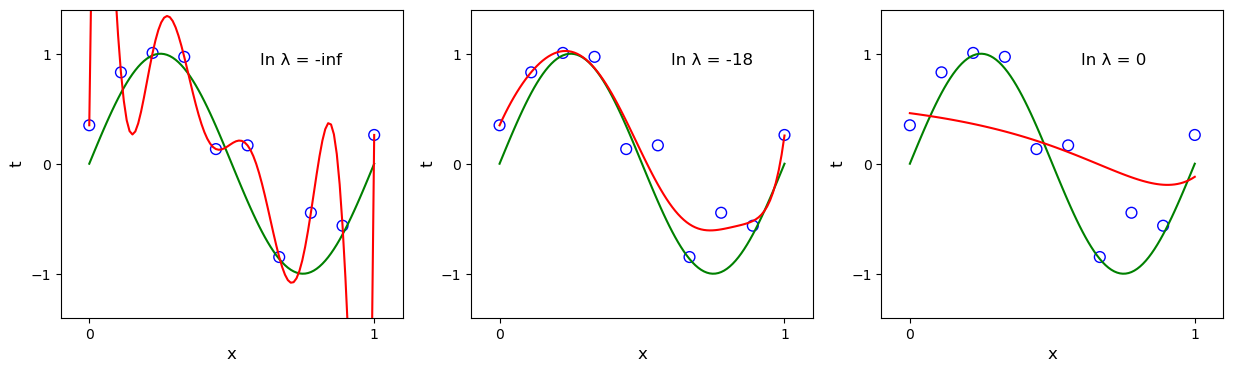

In [9]:
ln_lambda_list = [-np.inf, -18, 0]
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, ln_lambda in enumerate(ln_lambda_list):
    t_pred, _ = poly_fit_ridge(x, t, x_grid, M=9, ln_lambda=ln_lambda)
    plot_fit_ridge(x, t, x_grid, t_pred, ax[i], ln_lambda)

## Examine the coefficients (Table 1.2)

In [10]:
np.set_printoptions(precision=2)

In [11]:
def print_coefs(x, t, M, ln_lambda):
    """
    Args:
        x (np.array, float64): inputs
        t (np.array, float64): target values
    Returns:
        prints the coefficients
    """
    _, coef = poly_fit_ridge(x, t, x_grid, M, ln_lambda)
    print('\n'.join([f'w{i}:  {c:.2f}' for i, c in enumerate(coef)]))

In [12]:
print_coefs(x, t, M=9, ln_lambda=-np.inf)

w0:  0.35
w1:  232.12
w2:  -5316.06
w3:  48516.67
w4:  -231398.06
w5:  639388.50
w6:  -1060735.17
w7:  1041371.26
w8:  -557140.67
w9:  125081.32


In [13]:
print_coefs(x, t, M=9, ln_lambda=-18)

w0:  0.35
w1:  5.77
w2:  -14.97
w3:  29.86
w4:  -95.62
w5:  35.17
w6:  168.71
w7:  -18.04
w8:  -273.18
w9:  162.19


In [14]:
print_coefs(x, t, M=9, ln_lambda=0)

w0:  0.46
w1:  -0.34
w2:  -0.37
w3:  -0.24
w4:  -0.12
w5:  -0.02
w6:  0.05
w7:  0.11
w8:  0.16
w9:  0.20
